# Piquaf notebook

Copyright (c) 2023, Cibby Pulikkaseril
All rights reserved.

This source code is licensed under the BSD-style license found in the
LICENSE file in the root directory of this source tree. 

Piquaf is a open source Python tool to create <b>P</b>ublication <b>QUA</b>lity <b>F</b>igures.

Github link: https://github.com/acoustic-cib/piquaf


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import re

We'll create a simple figure with two plots, axis labels, title and a legend.

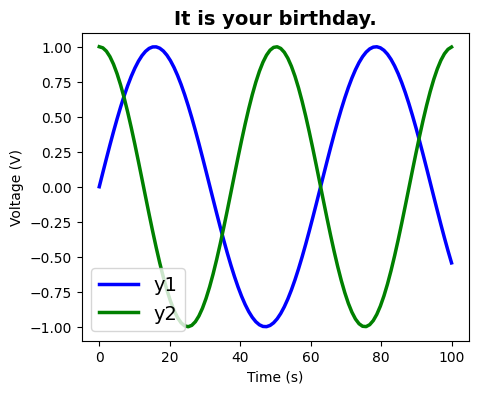

In [36]:
fig, ax = plt.subplots(figsize=(5,4))    # define fig and axes

x = np.linspace(0,100,100)   
y1 = np.sin(x/10)       
y2 = np.cos(x/8)       

ax.plot(x, y1, linewidth=2.5, label='y1') 
ax.plot(x, y2, linewidth=2.5, label='y2') 

ax.lines[0].set_color('b')
ax.lines[1].set_color('g')

#add titles, x labels, y labels, legend
title   = ax.set_title('It is your birthday.', fontsize=14, fontweight='bold')
xlabels = ax.set_xlabel('Time (s)')
ylabels = ax.set_ylabel('Voltage (V)')
legend  = ax.legend(fontsize=14)

## Test functions

In [1]:
from piquaf.extools import get_title, get_xlabel, get_ylabel, extract_data

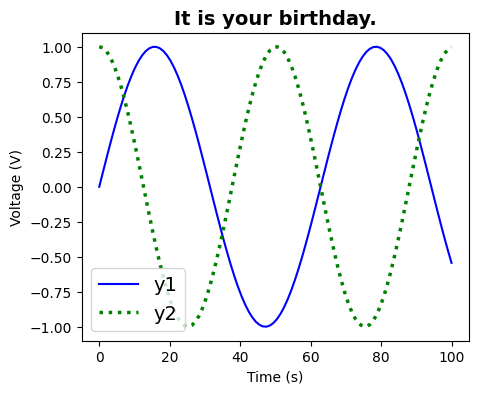

In [4]:
fig, ax = plt.subplots(figsize=(5,4))    # define fig and axes

x = np.linspace(0,100,100)   
y1 = np.sin(x/10)       
y2 = np.cos(x/8)       

ax.plot(x, y1, linewidth=1.5, label='y1') 
ax.plot(x, y2, linestyle=':', linewidth=2.5, label='y2') 

ax.lines[0].set_color('b')
ax.lines[1].set_color('g')

#add titles, x labels, y labels, legend
title   = ax.set_title('It is your birthday.', fontsize=14, fontweight='bold')
xlabels = ax.set_xlabel('Time (s)')
ylabels = ax.set_ylabel('Voltage (V)')
legend  = ax.legend(fontsize=14)

In [5]:
def test_get_title():
    title = get_title(fig)
    assert title == 'It is your birthday.', print('get_title caused an error')

def test_get_xlabel():
    xlabel = get_xlabel(fig)
    assert xlabel == 'Time (s)', print('get_xlabel caused an error')

def test_get_ylabel():
    ylabel = get_ylabel(fig)
    assert ylabel == 'Voltage (V)', print('get_ylabel caused an error')

    


In [6]:
def test_extract_data():

    list_line = extract_data(fig)
    
    label1 = list_line[0]['label']
    label2 = list_line[1]['label']
    color1 = list_line[0]['color']
    color2 = list_line[1]['color']
    ls1 = list_line[0]['line_style']
    ls2 = list_line[1]['line_style']
    lw1 = list_line[0]['line_width']
    lw2 = list_line[1]['line_width']

    assert (label1 == 'y1') & (label2 == 'y2'), "Error with extracting labels"
    assert (color1 == 'b') & (color2 == 'g'), "error with extracting color"
    assert (ls1 == '-') & (ls2 == ':'), "error with extracting linestyle"
    assert (lw1 == 1.5) & (lw2 == 2.5), 'error with extracting linewidth'

In [7]:
test_get_title()
test_get_xlabel()
test_get_ylabel()
test_extract_data()

In [3]:
from pyx import graph

g = graph.graphxy(width=10)
g.plot(graph.data.file("test.dat", x=1, y=2))
g.writePDFfile("x")

In [33]:
import tempfile
import os
from pyx import graph
from piquaf.extools import get_title, get_xlabel, get_ylabel, extract_data
from piquaf.plt2pyx import createLine2D
from numpy import savetxt, column_stack, array

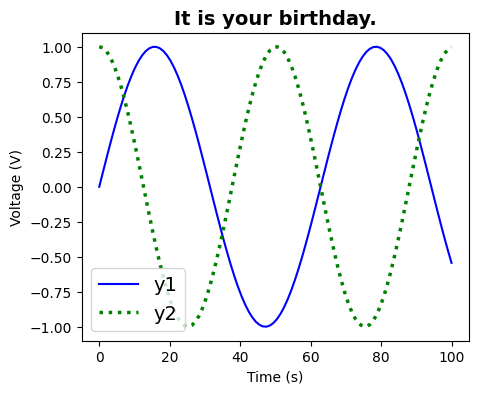

In [17]:
fig, ax = plt.subplots(figsize=(5,4))    # define fig and axes

x = np.linspace(0,100,100)   
y1 = np.sin(x/10)       
y2 = np.cos(x/8)       

ax.plot(x, y1, linewidth=1.5, label='y1') 
ax.plot(x, y2, linestyle=':', linewidth=2.5, label='y2') 

ax.lines[0].set_color('b')
ax.lines[1].set_color('g')

#add titles, x labels, y labels, legend
title   = ax.set_title('It is your birthday.', fontsize=14, fontweight='bold')
xlabels = ax.set_xlabel('Time (s)')
ylabels = ax.set_ylabel('Voltage (V)')
legend  = ax.legend(fontsize=14)

In [27]:
title = get_title(fig)
xlabel = get_xlabel(fig)
ylabel = get_ylabel(fig)
list_line = extract_data(fig)
fname = 'graph'

In [40]:
cur_dir = os.path.curdir


# First create datafiles
data_file_list = []
for ind, this_line in enumerate(list_line):
    x = array(this_line["x"])
    y = array(this_line["y"])

    data_file_list.append(f"{fname:s}_{ind:d}.dat")
    savetxt(os.path.join(cur_dir,data_file_list[ind]), column_stack([x, y]), fmt="%.4f", delimiter=" ")

# next create PxY graph
g = graph.graphxy(width=10, x=graph.axis.linear(min=0, max=50, title=xlabel), y=graph.axis.linear(min=-0.5, max=0.5, title=ylabel))
for ind, this_df in enumerate(data_file_list):
    g.plot(graph.data.file(this_df, x=1, y=2))

g.writePDFfile(fname)
    

AttributeError: 'str' object has no attribute 'createdata'

In [32]:
data_file_list

['graph_0.dat', 'graph_1.dat']